In [14]:
from tensorflow import keras
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

In [15]:
(train_images, train_labels), _ = mnist.load_data()
train_images = np.array(train_images).reshape((60000, 28*28))
train_images = train_images.astype("float32") / 255

Changing the capacity of the model is going to directly affect the validation loss when we try to overfit it to the given dataset

In [16]:
model = keras.Sequential([
    keras.layers.Dense(96, activation=keras.activations.relu),
    keras.layers.Dense(96, activation=keras.activations.relu),
    keras.layers.Dense(10, activation=keras.activations.softmax)
])

In [17]:
model.compile(
    optimizer="rmsprop",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

In [18]:
history_small_model = model.fit(
    train_images, 
    train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2
)

Epoch 1/20
375/375 [==============================] - 3s 6ms/step - loss: 0.3668 - accuracy: 0.8962 - val_loss: 0.1824 - val_accuracy: 0.9467
Epoch 2/20
375/375 [==============================] - 2s 5ms/step - loss: 0.1665 - accuracy: 0.9513 - val_loss: 0.1393 - val_accuracy: 0.9603
Epoch 3/20
375/375 [==============================] - 2s 5ms/step - loss: 0.1161 - accuracy: 0.9654 - val_loss: 0.1141 - val_accuracy: 0.9660
Epoch 4/20
375/375 [==============================] - 2s 5ms/step - loss: 0.0898 - accuracy: 0.9725 - val_loss: 0.1099 - val_accuracy: 0.9669
Epoch 5/20
375/375 [==============================] - 2s 5ms/step - loss: 0.0724 - accuracy: 0.9781 - val_loss: 0.1000 - val_accuracy: 0.9707
Epoch 6/20
375/375 [==============================] - 2s 5ms/step - loss: 0.0594 - accuracy: 0.9816 - val_loss: 0.0914 - val_accuracy: 0.9747
Epoch 7/20
375/375 [==============================] - 2s 5ms/step - loss: 0.0495 - accuracy: 0.9846 - val_loss: 0.0960 - val_accuracy: 0.9739
Epoch 

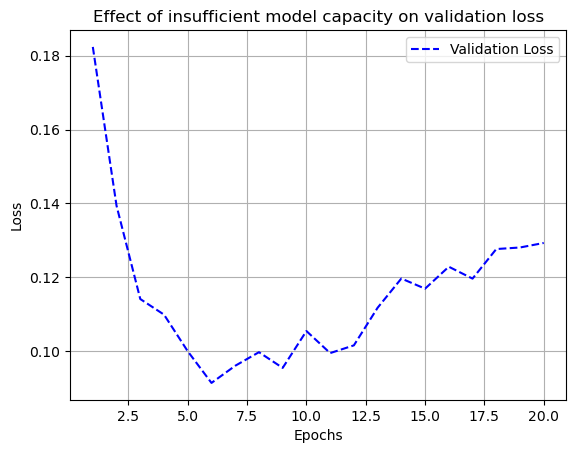

In [19]:
val_loss = history_small_model.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_loss, "b--", label="Validation Loss")
plt.title("Effect of model capacity on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid()
plt.show()